<a href="https://colab.research.google.com/github/Sonaljothylingam/stock-market-prediction/blob/main/Attemptno_445(Nero_stoxx).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT PROGRESS REPORT**
<hr>


##Week 1:
-->This section consisted of mostly research, since this was a fairly new topic for all of us, it did require some amount of time to get everyone into the groove.

This week also consisted of sourcing all of the datasets for the actual  model  itself. Everyone from the team was involved in this section of the work.

##Week 2:
-->Since this is a machine learning project, and the knowledge levels of every team member is varied, division of work was challenging.
But it was finalized that Sravya and Sonal were on the stock module functions duty. The model pretty much adjusts itself to these functions. The rest of us were still figuring out how to leverage these functions to benefit our model

##Week 3:
-->All of the functions were created and defined by the end of this week. This pretty much guaranteed the backbone of our project. Contributions in this case were made by Darshan, Sonal and Sravya.



In [ ]:
from google.colab import files
import pandas as pd
from google.colab import drive

In [ ]:

drive.mount('/content/drive')  #this is so that all of the files remain stored on this notebook, as they get deleted with each runtime
                                #run this every 12hours, if you need to make changes to the code

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

drive.flush_and_unmount() #unmounting

In [ ]:
!kaggle datasets list #not required


In [ ]:
!kaggle datasets download -d qks1lver/nasdaq-and-nyse-stocks-histories #DO NOT RUN THIS!!!

In [ ]:
!kaggle datasets download -d finintelligence/nasdaq-financial-fundamentals #DO NOT RUN THIS!!!

In [ ]:
!unzip /content/drive/MyDrive/nasdaq-financial-fundamentals.zip  #DO NOT RUN THIS!!!

In [ ]:
pd.read_csv('/content/drive/MyDrive/Storage_Fold/Datasets_1/all_symbols.txt')

,ARMK
0,CMI
1,MOSC
2,IT
3,CERS
4,DOMO
...,...
5876,HRI
5877,SWZ
5878,SNE
5879,DWAS


In [ ]:
pd.read_csv('/content/drive/MyDrive/Storage_Fold/Datasets_1/full_history/GOOGL.csv')  #run this block to test if it is able to fetch the file (depending on your own path)

,date,volume,open,close,high,low,adjclose
0,2018-11-02,2171900,1089.000000,1071.489990,1098.000000,1067.660034,1071.489990
1,2018-11-01,2006600,1091.400024,1085.979980,1099.900024,1077.819946,1085.979980
2,2018-10-31,3545800,1068.199951,1090.579956,1108.000000,1068.199951,1090.579956
3,2018-10-30,2988400,1020.010010,1049.510010,1050.900024,1013.969971,1049.510010
4,2018-10-29,4064500,1096.540039,1034.729980,1108.829956,1007.200012,1034.729980
...,...,...,...,...,...,...,...
3574,2004-08-25,9188600,52.532532,53.053055,54.054054,51.991993,53.053055
3575,2004-08-24,15247300,55.675674,52.487488,55.855854,51.836838,52.487488
3576,2004-08-23,18256100,55.430431,54.754753,56.796795,54.579578,54.754753
3577,2004-08-20,22834300,50.555557,54.209209,54.594593,50.300301,54.209209


In [ ]:
pd.read_csv('/content/drive/MyDrive/Storage_Fold/Datasets_1/full_history/GOOGL.csv')

Everything above this is for setups and tests, not the actual code. <br>
If you wanna run some tests yourself then create a cell above this text box <br>
**Only for organization purposes**
<hr>

#  **IMPLEMENTATION**
**Trend following indicators :** <br>
*Simple Moving Averages (SMA) <br>
Exponential Moving Averages (EMA) <br>
**(Sonal and Sravya)**<br>
Moving Average Convergence Divergence (MACD)  <br>
MACD Signal* <br>
**Mean Reversion Indicators :** <br>
*Bollinger Bands* <br>
**Momentum indicators :** <br>
*Stochastic Oscillator* <br>
(**darsh anime**)<br>
*Relative Strength Index (RSI)* <br>
<hr>

**PS** :-- I'll assign roles for each of these indicators


# CODE

In [ ]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Datasets_1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Functions
*These functions are defined separately here, and contain all of the tools required to be implemented in the next cell*<br>
*do not sweat too hard over the in-depth mechanisms of these indicators,*<br>
*just understand why they are used, and check out a sample python implementation for each of them for a rough reference*

# New Section

In [ ]:
def SimpleMovingAverage(df, DataColumn, win):  #function1 (SMA)  --help(https://www.investopedia.com/terms/m/movingaverage.asp)
  # df['sma'] = df['data_column'].rolling(window = win).mean()
   newColumn = str(win) + "SMA" + "_" + DataColumn
   return df[DataColumn].rolling(window = win).mean()
  
def ExponentialMovingAverage(df, DataColumn, win):
    newColumn = str(win) + "EMA" + "_" + DataColumn
    return df[DataColumn].ewm(span=win, adjust=False, ignore_na=False).mean()                  # EMA --help(https://www.investopedia.com/terms/e/ema.asp)  

def MovingAverageCD(df, DataColumn, win1, win2, signal_win, isSignal):                            # MACD --help(https://www.investopedia.com/terms/m/macd.asp)
    EMA1 = df[DataColumn].ewm(span=win1, min_periods=0, adjust=False, ignore_na=False).mean()
    EMA2 = df[DataColumn].ewm(span=win2, min_periods=0, adjust=False, ignore_na=False).mean()
    MACD = EMA1 - EMA2      #MACD=(12-Period EMA) − (26-Period EMA)
    df[str(win1) + "-" + str(win2) + "MACD" + "_" + DataColumn] = MACD
    if(isSignal):
        df["MACD_" + str(signal_win) + "SMA"] = MACD.ewm(span=signal_win,min_periods=0,adjust=False,ignore_na=False).mean()

                                                                           # SO --help(https://www.investopedia.com/terms/s/stochasticoscillator.asp)
def StochasticOscillator(df,DataColumn,win, signal_win, isSignal):
  SO = ((df[DataColumn] - df[DataColumn].rolling(window=win).min()) /
              (df[DataColumn].rolling(window=win).max() - df[DataColumn].rolling(window=win).min())) * 100
  df[str(win) + "SO" + "_" + DataColumn] = SO
    
  if(isSignal):
    df["SO_" + str(signal_win) + "SMA"] = SO.rolling(window=signal_win).mean()


def BollingerBands(df, DataColumn, win):  
    SMA = df[DataColumn].rolling(window=win).mean()
    std = df[DataColumn].rolling(window=win).std()
    df[str(win) + "upper_" + DataColumn] = SMA + (2 * std)
    df[str(win) + "middle_" + DataColumn] = SMA
    df[str(win) + "lower_" + DataColumn] = SMA - (2 * std)                          

def RelativeStrengthIndex(df, DataColumn, win, isEMA, isSMA):  
    data = df[DataColumn]
    delta = data.diff()
    # First row will always be NaN since there was no previous row for discrete calculation
    delta = delta[1:] 

    # Make the positive gains (up) and negative gains (down)
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    if(isEMA):
        # Calculate the EMAs
        roll_up1 = up.ewm(span=win,min_periods=0,adjust=False,ignore_na=False).mean()
        roll_down1 = down.abs().ewm(span=win,min_periods=0,adjust=False,ignore_na=False).mean()

        # Calculate the RSI based on EMA
        RS1 = roll_up1 / roll_down1
        name1 = str(win) + "RSI" + "_" + "EMA" + "_" + DataColumn
        df[name1] = 100.0 - (100.0 / (1.0 + RS1))

    if(isSMA):
        # Calculate the SMAs
        roll_up2 = up.rolling(window=win).mean()
        roll_down2 = down.abs().rolling(window=win).mean()

        # Calculate the RSI based on SMA
        RS2 = roll_up2 / roll_down2
        name2 = str(win) + "RSI" + "_" + "SMA" + "_" + DataColumn
        df[name2] = 100.0 - (100.0 / (1.0 + RS2))
                   
#MACD measures the relationship between two EMAs, while the RSI measures price change in relation to recent price highs and lows. 
#Just to sort out any mixups between the 2.




# Time to compile all the data functions
*Here you got the list of tickers, and a dataframe*<br>
*We shall call all of the list of functions defined in the cell block above*

In [ ]:
def getStockData(tickers):
    df = pd.DataFrame()
    for ticker in tickers:
        data = pd.read_csv("/content/drive/MyDrive/Storage_Fold/Datasets_1/full_history/" + ticker + ".csv")
        data = data.sort_index(axis=0, ascending=False)
        data = data.drop(['adjclose', 'high', 'low'], axis=1)
        # cropped out columns
        
        data["date"] = pd.to_datetime(data["date"])
        #data["date_day_of_week"] = data["date"].dt.dayofweek
        #data["date_year"] = data["date"].dt.year
        #data["date_day"] = data["date"].dt.day



         # Simple Moving Average (df, column for calculations, window)
        SimpleMovingAverage(data, 'open', 50)
        SimpleMovingAverage(data, 'open', 200)
        
        # Exponetial Moving Average
        ExponentialMovingAverage(data, 'open', 12)
        ExponentialMovingAverage(data, 'open', 26)
        
        # Moving Average Convergence Divergence (plus signal) (window1_EMA - window2_EMA) 
        MovingAverageCD(data, 'open', 12, 26, 9, True)

        StochasticOscillator(data, 'open', 14, 3, True)

         # Relative Strength Index (EMA, SMA)
        RelativeStrengthIndex(data, 'open', 14, True, True)
        
        # Bollinger Bands
        BollingerBands(data, 'open', 20)
    
        data['close-1'] = data['close'].shift(1)  #The previous day's closing
        data['log_label'] = np.where(data['close'] > (1.0 * data['close-1']), 1, 0) #checks if the next day is higher than the previous close?
       
        #cut ten perc statement REMEMBER 
        
        data["ticker"] = ticker
        df = df.append(data,ignore_index=True)
    df2 = pd.get_dummies(df["ticker"])
    df = pd.concat([df, df2], axis=1, join='outer')
    return df

# LIST OF TICKERS

In [ ]:
numbersss = int(input("Enter number of elements : "))
  
# Below line read inputs from user using map() function 
ticker_list = list(map(str,input("\nEnter the tickers : ").strip().split()))[:numbersss]
  
print("\nList is - ", ticker_list)

# Call the said function 
df =getStockData(ticker_list)

# drop na from SMAs
df = df.dropna()

# this ensures an even mix (relatively) of companies in each data split
df = df.sort_values(by=['date'])

df.tail()

Enter number of elements : 3

Enter the tickers : AMZN GOOG IBM

List is -  ['AMZN', 'GOOG', 'IBM']


,date,volume,open,close,12-26MACD_open,MACD_9SMA,14SO_open,SO_3SMA,14RSI_EMA_open,14RSI_SMA_open,20upper_open,20middle_open,20lower_open,close-1,log_label,ticker,AMZN,GOOG,IBM
8982,2018-11-01,1482000,1075.800049,1070.000000,-29.794439,-27.548022,57.067849,33.528284,48.343022,45.641824,1174.801996,1097.725504,1020.649011,1076.770020,0,GOOG,0,1,0
5403,2018-11-01,8135500,1623.530029,1665.530029,-84.134907,-64.609491,38.518911,20.675018,40.270633,36.057324,1972.893753,1753.117999,1533.342246,1598.010010,1,AMZN,1,0,0
8983,2018-11-02,1838200,1073.729980,1057.790039,-27.906938,-27.619805,55.313553,51.966135,47.862586,45.253380,1163.354172,1093.037003,1022.719833,1070.000000,0,GOOG,0,1,0
5404,2018-11-02,6952000,1678.589966,1665.530029,-78.063239,-67.300241,53.957864,38.660972,47.910367,41.727424,1948.861160,1741.147998,1533.434836,1665.530029,0,AMZN,1,0,0
21306,2018-11-02,10587400,117.510002,115.669998,-7.834022,-6.234263,7.327753,2.442584,23.016350,20.352590,153.976882,132.097499,110.218116,116.830002,0,IBM,0,0,1


In [ ]:
#here we split the data at 70%, 20%, and 10%
n = len(df)
# try model with less data
#aapl_df = aapl_df[int(n*0.25):]
n = len(df)

train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]


# shuffles the data within each category
train_df = train_df.sample(frac=1)
val_df = val_df.sample(frac=1)
test_df = test_df.sample(frac=1)

#get labels for each data split
train_y = train_df["log_label"]
val_y = val_df["log_label"]
test_y = test_df["log_label"]

#get features for each data split, everything except for open and close price of the past 3 days

#train_X = train_df.drop(columns=['close', 'open', 'log_label'])
#val_X = val_df.drop(columns=['close', 'open', 'log_label'])
#test_X = test_df.drop(columns=['close', 'open', 'log_label'], axis=1)

train_date = train_df['date']
val_date = val_df['date']
test_date = test_df['date']


train_X = train_df.drop(['log_label', 'close', 'open', 'date', 'ticker', 'volume'], axis=1)
val_X = val_df.drop(['log_label', 'close', 'open', 'date', 'ticker', 'volume'], axis=1)
test_X = test_df.drop(['log_label', 'close', 'open', 'date', 'ticker', 'volume'], axis=1)

train_X.describe()

,12-26MACD_open,MACD_9SMA,14SO_open,SO_3SMA,14RSI_EMA_open,14RSI_SMA_open,20upper_open,20middle_open,20lower_open,close-1,AMZN,GOOG,IBM
count,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000
mean,0.211138,0.214263,52.739043,52.743878,51.701944,51.794212,65.237067,60.809619,56.382172,61.053922,0.219242,0.096477,0.684281
std,2.335780,2.215083,37.059477,34.460003,16.684096,17.043067,66.238613,61.806383,57.622397,62.031350,0.413747,0.295254,0.464817
min,-20.764868,-18.475040,0.000000,0.000000,2.789004,0.000000,1.675150,1.543750,1.044527,1.489583,0.000000,0.000000,0.000000
25%,-0.319888,-0.298808,16.409165,18.757382,39.313344,39.242880,18.766303,17.571973,16.708959,17.656250,0.000000,0.000000,0.000000
50%,0.076390,0.080114,55.308516,55.555556,51.560109,51.645723,35.461242,33.013281,30.975195,33.125000,0.000000,0.000000,1.000000
75%,0.643939,0.639919,90.243902,86.638027,64.012472,64.331109,92.135772,86.021000,80.791218,86.479998,0.000000,0.000000,1.000000
max,18.546685,16.827719,100.000000,100.000000,96.223464,100.000000,373.989587,346.388330,333.432924,368.498260,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn import linear_model

#Intializes the model and fits it to the training data
model = linear_model.LogisticRegression(random_state=0, max_iter=5000)
#model = linear_model.LogisticRegression(random_state=0, penalty = 'l2', C=.01)
model.fit(train_X, train_y)
y_val_pred = model.predict(val_X)
y_test_pred = model.predict(test_X)

import math
from sklearn.metrics import accuracy_score, mean_squared_error

def eval_metrics(y_actual, y_predict, dataset):
    print("\nEvaluation metrics for " + dataset + ":\n")
    print("Accuracy score is: %.2f" % accuracy_score(y_actual, y_predict))
    print("Mean Squared Error: %.3f" % mean_squared_error(y_actual, y_predict))
    print("Root Mean Squared Error: %.3f" % math.sqrt(mean_squared_error(y_actual, y_predict)))
    
    
eval_metrics(val_y, y_val_pred, "Val data")
eval_metrics(test_y, y_test_pred, "Test data")




pred_df = pd.DataFrame(val_y)
pred_df["pred"] = y_val_pred
pred_df['date'] = val_df['date']
pred_df['close'] = val_df['close']
for ticker in ticker_list:
    pred_df[ticker] = val_X[ticker]

pred_df = pred_df.sort_values(by=['date'])
pred_df.describe()


Evaluation metrics for Val data:

Accuracy score is: 0.59
Mean Squared Error: 0.405
Root Mean Squared Error: 0.637

Evaluation metrics for Test data:

Accuracy score is: 0.57
Mean Squared Error: 0.427
Root Mean Squared Error: 0.654


,log_label,pred,close,AMZN,GOOG,IBM
count,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000
mean,0.510233,0.549047,295.837130,0.333098,0.333333,0.333569
std,0.499954,0.497647,148.057601,0.471377,0.471460,0.471543
min,0.000000,0.000000,108.610001,0.000000,0.000000,0.000000
25%,0.000000,0.000000,184.645004,0.000000,0.000000,0.000000
50%,1.000000,1.000000,250.719315,0.000000,0.000000,0.000000
75%,1.000000,1.000000,367.849991,1.000000,1.000000,1.000000
max,1.000000,1.000000,776.599976,1.000000,1.000000,1.000000


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, y_test_pred)

cm_display = pd.DataFrame(cm)
cm_display
#X axis is predicted
#y axis is actual

In [ ]:
def predByCompany(ticker_list):
    from tabulate import tabulate # better looking tables when printed
    for ticker in ticker_list:
        df = pd.DataFrame(pred_df, columns=['log_label', 'pred', ticker])
        print(tabulate(df[df[ticker] == 1].describe(), headers=['log_label', 'pred', ticker]))
        print('\n')
        
# ticker_list defined above
predByCompany(ticker_list)

         log_label         pred    AMZN
-----  -----------  -----------  ------
count  1416         1416           1416
mean      0.514124     0.527542       1
std       0.499977     0.499417       0
min       0            0              1
25%       0            0              1
50%       1            1              1
75%       1            1              1
max       1            1              1


         log_label         pred    GOOG
-----  -----------  -----------  ------
count  1417         1417           1417
mean      0.513056     0.570924       1
std       0.500006     0.495119       0
min       0            0              1
25%       0            0              1
50%       1            1              1
75%       1            1              1
max       1            1              1


         log_label         pred    IBM
-----  -----------  -----------  -----
count  1418         1418          1418
mean      0.503526     0.54866       1
std       0.500164     0.497802      0
m

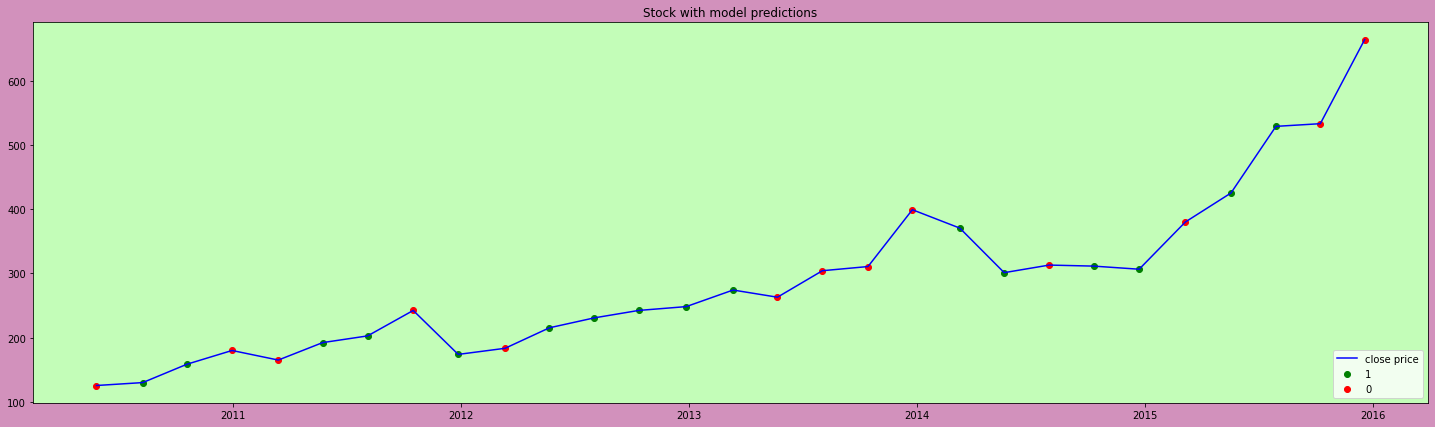

In [ ]:
#Visualisation of the data

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



plt.figure(figsize = (25,7),facecolor="#D291BC")

test_df = pred_df[pred_df[ticker_list[0]] == 1]
test_df = test_df[::50]

plt.subplot(1, 2, 1)

#Background color
ax=plt.axes()
ax.set_facecolor("#C3FDB8")


# plots green dots if prediction is 1, red dots if prediction is 0
plt.scatter(test_df['date'][test_df['pred'] == 1], (test_df['close'][test_df['pred'] == 1] * test_df['pred'][test_df['pred'] == 1]), color='Green', label = '1')
plt.scatter(test_df['date'][test_df['pred'] == 0], (test_df['close'][test_df['pred'] == 0] + test_df['pred'][test_df['pred'] == 0]), color='Red', label = '0')

# plots stock price and sets title
plt.plot(test_df['date'], test_df['close'], color='Blue', label = 'close price')
plt.title("Stock with model predictions")
plt.legend(loc='lower right')

plt.show()


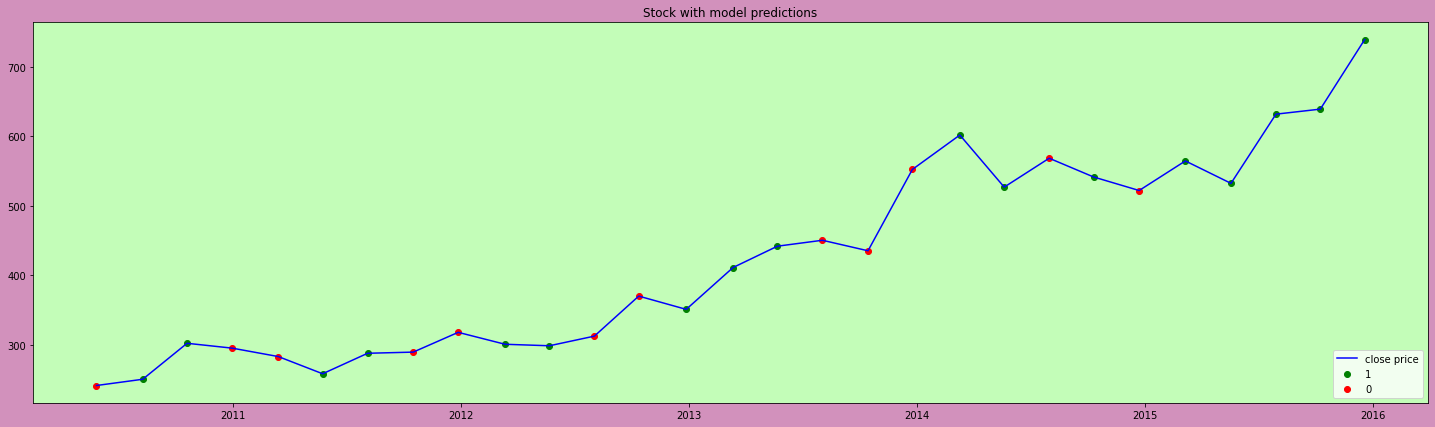

In [ ]:

plt.figure(figsize = (25,7),facecolor="#D291BC")


test_df = pred_df[pred_df[ticker_list[1]] == 1]
test_df = test_df[::50]

plt.subplot(1, 2, 1)

#Background color
ax=plt.axes()
ax.set_facecolor("#C3FDB8")

# plots green dots if prediction is 1, red dots if prediction is 0
plt.scatter(test_df['date'][test_df['pred'] == 1], (test_df['close'][test_df['pred'] == 1] * test_df['pred'][test_df['pred'] == 1]), color='Green', label = '1')
plt.scatter(test_df['date'][test_df['pred'] == 0], (test_df['close'][test_df['pred'] == 0] + test_df['pred'][test_df['pred'] == 0]), color='Red', label = '0')

# plots stock price and sets title
plt.plot(test_df['date'], test_df['close'], color='Blue', label = 'close price')
plt.title("Stock with model predictions")
plt.legend(loc='lower right')

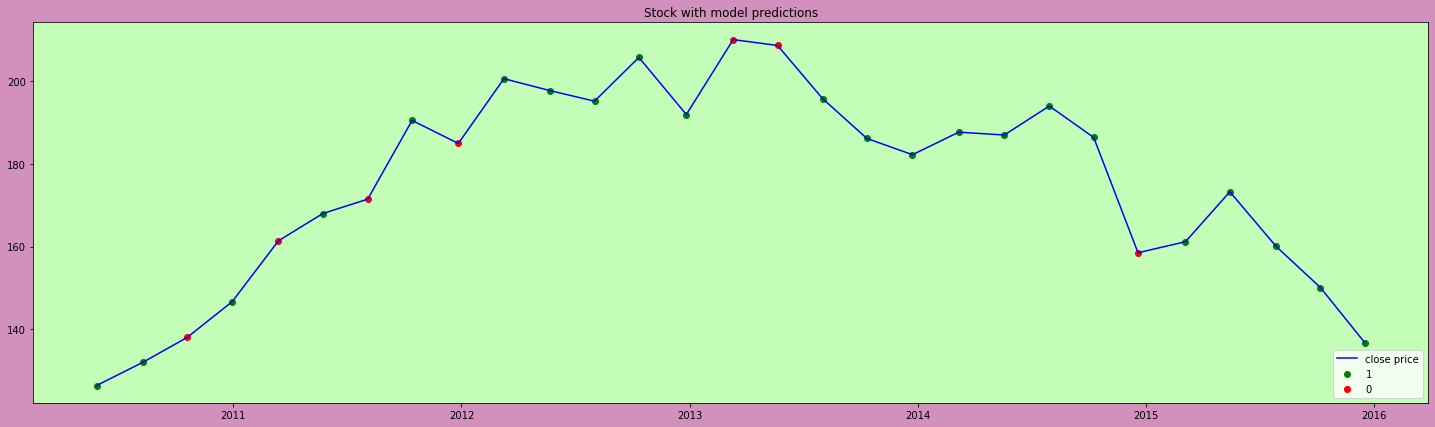

In [ ]:

plt.figure(figsize = (25,7),facecolor="#D291BC")

# creates data frame with only for stocks, uses first 50 entries for graph
test_df = pred_df[pred_df[ticker_list[2]] == 1]
test_df = test_df[::50]

plt.subplot(1, 2, 1)

#Background color
ax=plt.axes()
ax.set_facecolor("#C3FDB8")

# plots green dots if prediction is 1, red dots if prediction is 0
plt.scatter(test_df['date'][test_df['pred'] == 1], (test_df['close'][test_df['pred'] == 1] * test_df['pred'][test_df['pred'] == 1]), color='Green', label = '1')
plt.scatter(test_df['date'][test_df['pred'] == 0], (test_df['close'][test_df['pred'] == 0] + test_df['pred'][test_df['pred'] == 0]), color='Red', label = '0')

# plots stock price and sets title
plt.plot(test_df['date'], test_df['close'], color='Blue', label = 'close price')
plt.title("Stock with model predictions")
plt.legend(loc='lower right')


# **IT IS DONE WE WON**
<HR>